In [7]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# metadata 
print('metadata\n', glass_identification.metadata) 
  
# variable information 
print('variables\n',glass_identification.variables) 

print('feautures\n',X)


metadata
 {'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Cons

In [9]:
#create dataframe 
import pandas as pd
df = pd.DataFrame(data=X, columns=X.columns) # vi X da la 1 dataframe nen data=X
df['target'] = y-1

#print(type(X)) # su duung cai nay de xem X co phai la dataframe hay khong neu giang vien hoi

# Check the unique values in the target variable
# unique_classes = y.unique()
# num_classes = len(unique_classes)

# print(f"Unique classes in the target variable: {unique_classes}")
# print(f"Number of unique classes: {num_classes}")

# # Determine if it's a binary or multiclass classification
# if num_classes > 2:
#     print("This is a multiclass classification problem.")
# else:
#     print("This is a binary classification problem.")

df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,6
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,6
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,6
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,6


Column names in DataFrame: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'target'], dtype='object')
Number of columns in DataFrame: 10


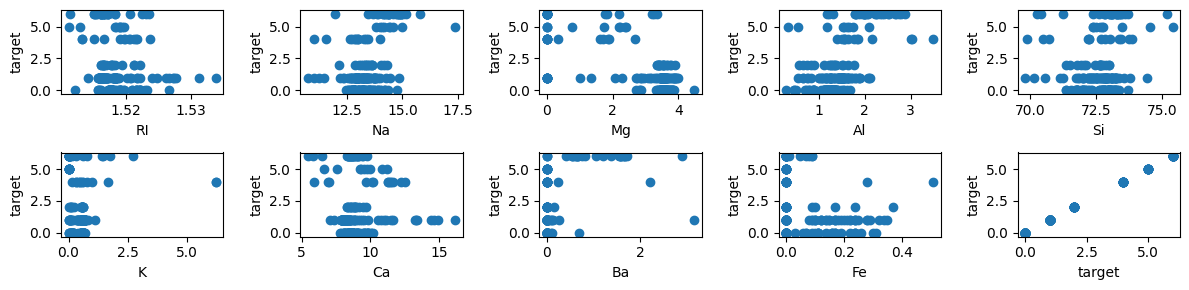

In [10]:
import matplotlib.pyplot as plt

# verify column names
print("Column names in DataFrame:", df.columns)

# debug the number of columns
num_columns = len(df.columns)
print("Number of columns in DataFrame:", num_columns)

# Create subplots
fig, ax = plt.subplots(2, 5, figsize=(12, 3))  # 2 rows, 5 columns

for i in range(2):
    for j in range(5):
        c = (i * 5) + j 
        if c < num_columns:
            column = df.columns[c]
            ax[i, j].scatter(df[column], df['target'])
            ax[i, j].set_xlabel(column)
            ax[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

In [11]:
#create dataset from dataframe
X = df.loc[:, 'RI':'Fe']
y = df.loc[:, 'target']
print('\n(X_data, y_data):\n',X,'\n',y)

# Split the data into training and testing sets
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1234)
print('\n(X_train, y_train):\n',X_train,'\n',y_train)
print('\n(X_test, y_test):\n',X_test,'\n',y_test)


(X_data, y_data):
           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns] 
 0      0
1      0
2      0
3      0
4      0
      ..
209    6
210    6
211    6
212    6
213    6
Name: target, Length: 214, dtype: int64

(X_train, y_train):
           RI     Na    Mg    Al     Si     K     

f1:  0.702056
accuracy:  0.72093


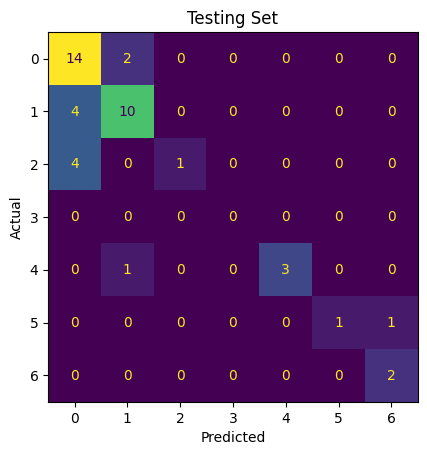

In [88]:
#K-NEAREST NEIGHBORS
#training with n_neighbors = 3 and p=2
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=3, p=2) # p=1: manhattan_distance, p=2: euclidean_distance
model.fit(X_train, y_train)

#evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_test_hat)
f1 = metrics.f1_score(y_test, y_test_hat, average='weighted')
KNNS = np.round(f1, 6)
KNNS2 = np.round(accuracy, 6)

print('f1: ', KNNS)
print('accuracy: ', KNNS2)

#visualization of confusion matrix
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels = [0,1,2,3,4,5,6], colorbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing Set')
plt.show()

f1: 0.418931
accuracy: 0.465116


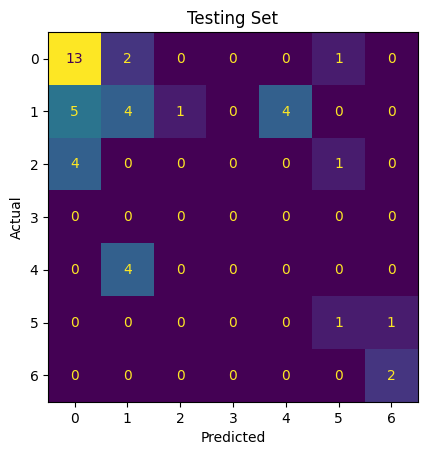

In [89]:
#GAUSSIAN NB
# su dung GaussianNB thay vi CategoricalNB vi CategoricalNB chi dung cho classification problem voi categorical features
#training
from sklearn import naive_bayes
model = naive_bayes.GaussianNB() 
model.fit(X_train, y_train)

#evaluatio
from sklearn import metrics
y_test_hat = model.predict(X_test)
#print(y_test_hat)
accuracy = metrics.accuracy_score(y_test, y_test_hat)
f1 = metrics.f1_score(y_test, y_test_hat, average='weighted')
predict_proba = model.predict_proba(X_test)

GNBS = np.round(f1, 6)
GNBS2 = np.round(accuracy, 6)

print('f1:', GNBS)
print('accuracy:', GNBS2)

#visualization of confusion matrix
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels = [0,1,2,3,4,5,6], colorbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Testing Set')
plt.show()



f1:  0.734003
accuracy:  0.744186


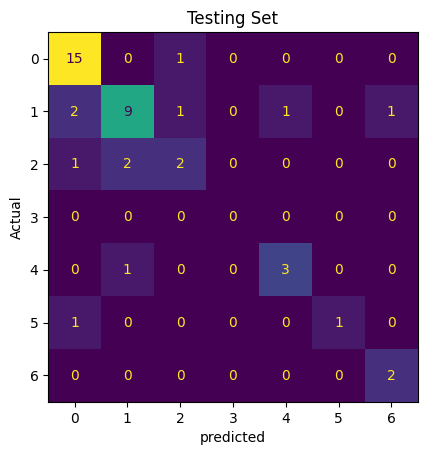

DTModel.pkl has been saved


In [13]:
#DECiSION TREE
#training with random_state = 0
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
#evaluation
from sklearn import metrics
import numpy as np
y_test_hat = model.predict(X_test)

DTS2 = metrics.accuracy_score(y_test, y_test_hat)
DTS = metrics.f1_score(y_test, y_test_hat, average='weighted')

#print ('y_test: ', y_test)
#print ('y_test_hat: ', y_test_hat)
print('f1: ', np.round(DTS, 6))
print('accuracy: ', np.round(DTS2, 6))

#visualization of confusion matrix
import matplotlib.pyplot as plt
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels = [0,1,2,3,4,5,6], colorbar = False)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Testing Set')
plt.show()

import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
if __name__ == '__main__':
    print('DTModel.pkl has been saved')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
accuracy: 0.627907
f1: 0.57607


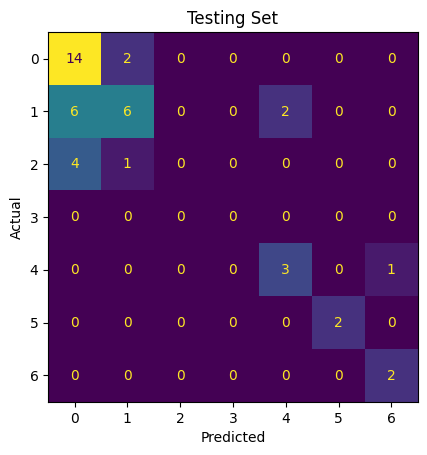

In [91]:
#NEURAL NETWORK
from keras import utils
from keras import layers
import numpy as np
from keras import models, layers, losses, optimizers
from sklearn import metrics
import matplotlib.pyplot as plt

# Normalize X_data (if needed)
# norm_layer = layers.Normalization(axis=-1)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

# norm_layer.adapt(X_train)
# Xn = norm_layer(X_train)
# Xn_test = norm_layer(X_test)

# Changing the shape of y_data to (n,1)
# Y = y_train.reshape(-1,1)
# Y_test = y_test.reshape(-1,1)

# One-hot encoding the target variables
Y = utils.to_categorical(y_train, 7)
Y_test = utils.to_categorical(y_test, 7)

# Training with epochs = 1000
model = models.Sequential([
    layers.Dense(units=9, activation='relu', name='hidden'),
    layers.Dense(units=7, activation='softmax', name='output')  # Use softmax for multiclass classification
])
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.01),
)
model.fit(X_train, Y, epochs=1000, verbose=0)

# Evaluation
Y_test_hat = (model.predict(X_test) >= 0.5).astype(int)
Y_test_hat = np.argmax(Y_test_hat, axis=1)  # Convert probabilities to class labels
Y_test_labels = np.argmax(Y_test, axis=1)  # Convert one-hot encoded test labels to class labels

NNS2 = metrics.accuracy_score(Y_test_labels, Y_test_hat)
NNS = metrics.f1_score(Y_test_labels, Y_test_hat, average='weighted')

print('accuracy:', np.round(NNS2, 6))
print('f1:', np.round(NNS, 6))

# Visualization of confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(Y_test_labels, Y_test_hat, labels=[0,1,2,3,4,5,6], colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing Set')
plt.show()

In [92]:
import pandas as pd

data = {
    "Method": [
        "K-Nearest Neighbors",
        "Gaussian Naive Bayes",
        "Decision Tree",
        "Neural Network",
    ],
    "F1 Score": [ KNNS, GNBS, DTS, NNS],
    "Accuracy": [ KNNS2, GNBS2, DTS2, NNS2]
}

# Create the DataFrame
df = pd.DataFrame(data, index=[1, 2, 3, 4])

# PRINT dataFRAME
df.style.set_caption("F1 Scores for Different Classification Methods")

,Method,F1 Score,Accuracy
1,K-Nearest Neighbors,0.702056,0.720930
2,Gaussian Naive Bayes,0.418931,0.465116
3,Decision Tree,0.734003,0.744186
4,Neural Network,0.576070,0.627907
